In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import cv2

from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

import numpy as np
import os
import PIL
import PIL.Image

In [3]:
import sys, os

In [4]:
sys.path

['c:\\Users\\xyang\\OneDrive\\Escritorio\\ARCHIVOS\\THEBRIDGE\\Data-Science-Bootcamp-21\\ENTREGABLES\\COMPETITION\\HAPPY',
 'c:\\Users\\xyang\\.vscode\\extensions\\ms-toolsai.jupyter-2021.6.999662501\\pythonFiles\\vscode_datascience_helpers',
 'c:\\Users\\xyang\\.vscode\\extensions\\ms-toolsai.jupyter-2021.6.999662501\\pythonFiles',
 'c:\\Users\\xyang\\.vscode\\extensions\\ms-toolsai.jupyter-2021.6.999662501\\pythonFiles\\lib\\python',
 'C:\\Users\\xyang\\AppData\\Local\\Programs\\Python\\Python37\\python37.zip',
 'C:\\Users\\xyang\\AppData\\Local\\Programs\\Python\\Python37\\DLLs',
 'C:\\Users\\xyang\\AppData\\Local\\Programs\\Python\\Python37\\lib',
 'C:\\Users\\xyang\\AppData\\Local\\Programs\\Python\\Python37',
 '',
 'C:\\Users\\xyang\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\xyang\\AppData\\Roaming\\Python\\Python37\\site-packages\\win32',
 'C:\\Users\\xyang\\AppData\\Roaming\\Python\\Python37\\site-packages\\win32\\lib',
 'C:\\Users\\xyang\\AppData\\Roamin

In [5]:
batch_size = 32 # Entrena de 32 en 32
img_height = 180
img_width = 180

data_dir = 'c:\\Users\\xyang\\OneDrive\\Escritorio\\ARCHIVOS\\THEBRIDGE\\Data-Science-Bootcamp-21\\ENTREGABLES\\COMPETITION\\HAPPY\\train'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,# Si quitamos estos tres de abajo, cogería toda la carpeta para el conjunto de training
  subset="training", # 
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6176 files belonging to 2 classes.
Using 4941 files for training.
Found 6176 files belonging to 2 classes.
Using 1235 files for validation.


In [6]:
train_ds.class_names

['happy', 'sadness']

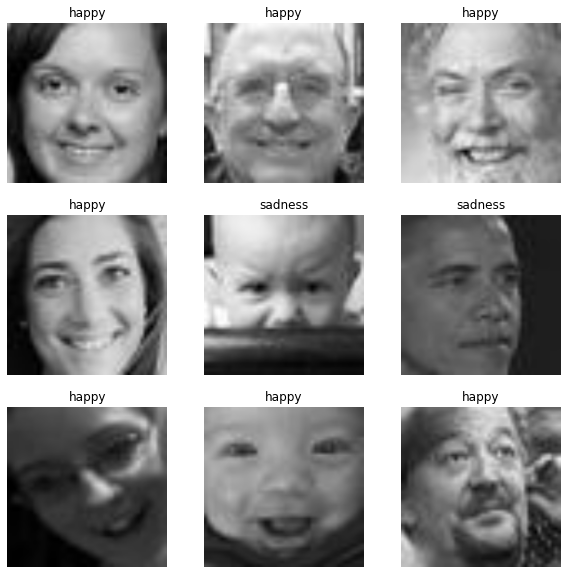

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (img_height, img_height, 3),
                  include_top=False,
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

    
##### FULLY CONNECTED LAYER #####
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['acc'])

In [9]:
model

In [10]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [11]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [14]:
vgghist = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = 5,
                    verbose=1)

Epoch 1/5
155/155 [==============================] - 511s 3s/step - loss: 0.1897 - acc: 0.9239 - val_loss: 0.5259 - val_acc: 0.8243
Epoch 2/5
155/155 [==============================] - 538s 3s/step - loss: 0.1688 - acc: 0.9318 - val_loss: 0.4965 - val_acc: 0.8381
Epoch 3/5
155/155 [==============================] - 544s 4s/step - loss: 0.1332 - acc: 0.9458 - val_loss: 0.5746 - val_acc: 0.8275
Epoch 4/5
155/155 [==============================] - 545s 4s/step - loss: 0.1338 - acc: 0.9474 - val_loss: 0.5312 - val_acc: 0.8219
Epoch 5/5
155/155 [==============================] - 523s 3s/step - loss: 0.1240 - acc: 0.9518 - val_loss: 0.5985 - val_acc: 0.8308


In [ ]:
dire = os.path.dirname(os.getcwd()) + os.sep + "HAPPY"+ os.sep + "test"

In [ ]:
def read_data(path):
    X = []

    for file in os.listdir(path):
        image = cv2.imread(path + '/' + file, flags=cv2.IMREAD_COLOR)
        smallimage = cv2.resize(image, (180, 180))
        
        X.append(smallimage)

    return np.array(X)
    

x_test = read_data(dire)

# Procesar las imagenes tal y como entran en el modelo
x_test = preprocess_input(x_test)
print(x_test.shape)

(4117, 48, 48, 3)


In [ ]:
preds = model.predict(x_test)

In [ ]:
set(preds)

NameError: name 'x_test' is not defined

In [ ]:
lista = []

for i in range(len(preds)):
    x = np.argmax(preds[i])
    lista.append(x)

type(lista)

list

In [ ]:
h_s = []

for x in lista:
    s = train_ds.class_names[x]
    h_s.append(s)

set(h_s)

{'happy'}

In [ ]:
# Parte 1: Leemos los nombres del fichero de test
import pandas as pd 
test_df = pd.read_csv('test_set.csv')
test_df

,id_img,path
0,18341,test/18341.jpg
1,13176,test/13176.jpg
2,23945,test/23945.jpg
3,15968,test/15968.jpg
4,18382,test/18382.jpg
...,...,...
4112,8966,test/08966.jpg
4113,12111,test/12111.jpg
4114,16629,test/16629.jpg
4115,24322,test/24322.jpg


In [ ]:
test_df.path[0][5:]

'18341.jpg'

In [ ]:
"""test_df.path = test_df.path.apply(lambda x: x[5:])
list_dir = list(test_df["path"])"""

In [ ]:
"""test_dir = 'c:\\Users\\xyang\\OneDrive\\Escritorio\\ARCHIVOS\\THEBRIDGE\\Data-Science-Bootcamp-21\\ENTREGABLES\\COMPETITION\\HAPPY\\test'

images = [tf.keras.preprocessing.image.load_img(test_dir + os.sep + filename, target_size=(img_height, img_width)) for filename in list_dir]
test_ds = np.array([tf.keras.preprocessing.image.img_to_array(img) for img in images])
test_ds = tf.data.Dataset.from_tensors(test_ds)"""

In [ ]:
test_ds

<TensorDataset shapes: (4117, 48, 48, 3), types: tf.float32>

In [ ]:
predictions = model.predict(test_ds)


In [ ]:
results

Error: Session cannot generate requests